In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier


In [23]:
df=pd.read_csv('Titanic-Dataset.csv')

In [24]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [26]:
df=df.drop(columns=['Name','Cabin','Sex','Ticket','Embarked'])

In [16]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [21]:
df.fillna(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,0.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [6]:
#feature importance
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))
feature_sel_model
feature_sel_model.fit(X,y)
feature_sel_model.get_support()
col=X.columns
col
select_feature=col[feature_sel_model.get_support()]
select_feature
X=X[select_feature]

In [17]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [18]:
feature_sel_model

SelectFromModel(estimator=Lasso(alpha=0.005))

In [31]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [32]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True])

In [34]:
col=X.columns

In [35]:
col

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [36]:
select_feature=col[feature_sel_model.get_support()]

In [37]:
select_feature

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [38]:
X=X[select_feature]

In [27]:
df['Age'].fillna(df['Age'].mean(),inplace=True)




In [28]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [29]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [30]:
X


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000
887,888,1,19.000000,0,0,30.0000
888,889,3,29.699118,1,2,23.4500
889,890,1,26.000000,0,0,30.0000


# Univariate selection

In [67]:
best_features=SelectKBest(score_func=chi2,k=4)

In [69]:
fit=best_features.fit(X,y)

In [70]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [71]:
feature_score=pd.concat([dfcolumns,dfscores],axis=1)
feature_score.columns=['spec','score']

In [72]:
feature_score

,spec,score
0,PassengerId,3.312934
1,Pclass,30.873699
2,Age,24.687926
3,SibSp,2.581865
4,Parch,10.097499
5,Fare,4518.319091


In [73]:
print(feature_score.nlargest(10,'score'))

          spec        score
5         Fare  4518.319091
1       Pclass    30.873699
2          Age    24.687926
4        Parch    10.097499
0  PassengerId     3.312934
3        SibSp     2.581865


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [109]:
df['Age']=df['Age'].astype('category')
df['Fare']=df['Fare'].astype('int')

In [110]:
df=pd.get_dummies(data=df,columns=['Sex','Embarked'])

In [111]:
X=df.drop(columns=['Survived'])
y=df['Survived']


In [112]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,A/5 21171,7,0,1,0,0,1
1,2,1,38.000000,1,0,PC 17599,71,1,0,1,0,0
2,3,3,26.000000,0,0,STON/O2. 3101282,7,1,0,0,0,1
3,4,1,35.000000,1,0,113803,53,1,0,0,0,1
4,5,3,35.000000,0,0,373450,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,211536,13,0,1,0,0,1
887,888,1,19.000000,0,0,112053,30,1,0,0,0,1
888,889,3,29.699118,1,2,W./C. 6607,23,1,0,0,0,1
889,890,1,26.000000,0,0,111369,30,0,1,1,0,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Age          891 non-null    category
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Ticket       891 non-null    object  
 7   Fare         891 non-null    int32   
 8   Sex_female   891 non-null    uint8   
 9   Sex_male     891 non-null    uint8   
 10  Embarked_C   891 non-null    uint8   
 11  Embarked_Q   891 non-null    uint8   
 12  Embarked_S   891 non-null    uint8   
dtypes: category(1), int32(1), int64(5), object(1), uint8(5)
memory usage: 53.3+ KB


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Age          891 non-null    category
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Ticket       891 non-null    object  
 7   Fare         891 non-null    int32   
 8   Sex_female   891 non-null    int32   
 9   Sex_male     891 non-null    int32   
 10  Embarked_C   891 non-null    int32   
 11  Embarked_Q   891 non-null    int32   
 12  Embarked_S   891 non-null    int32   
dtypes: category(1), int32(6), int64(5), object(1)
memory usage: 66.4+ KB


In [116]:
best_features=SelectKBest(score_func=chi2,k=6)

# corretaion metrix with heatmap

In [117]:
cormat=df.corr()

In [114]:
df['Sex_female']=df['Sex_female'].astype('int')
df['Sex_male']=df['Sex_male'].astype('int')
df['Embarked_C']=df['Embarked_C'].astype('int')
df['Embarked_Q']=df['Embarked_Q'].astype('int')
df['Embarked_S']=df['Embarked_S'].astype('int')

In [118]:
top_corr=cormat.index

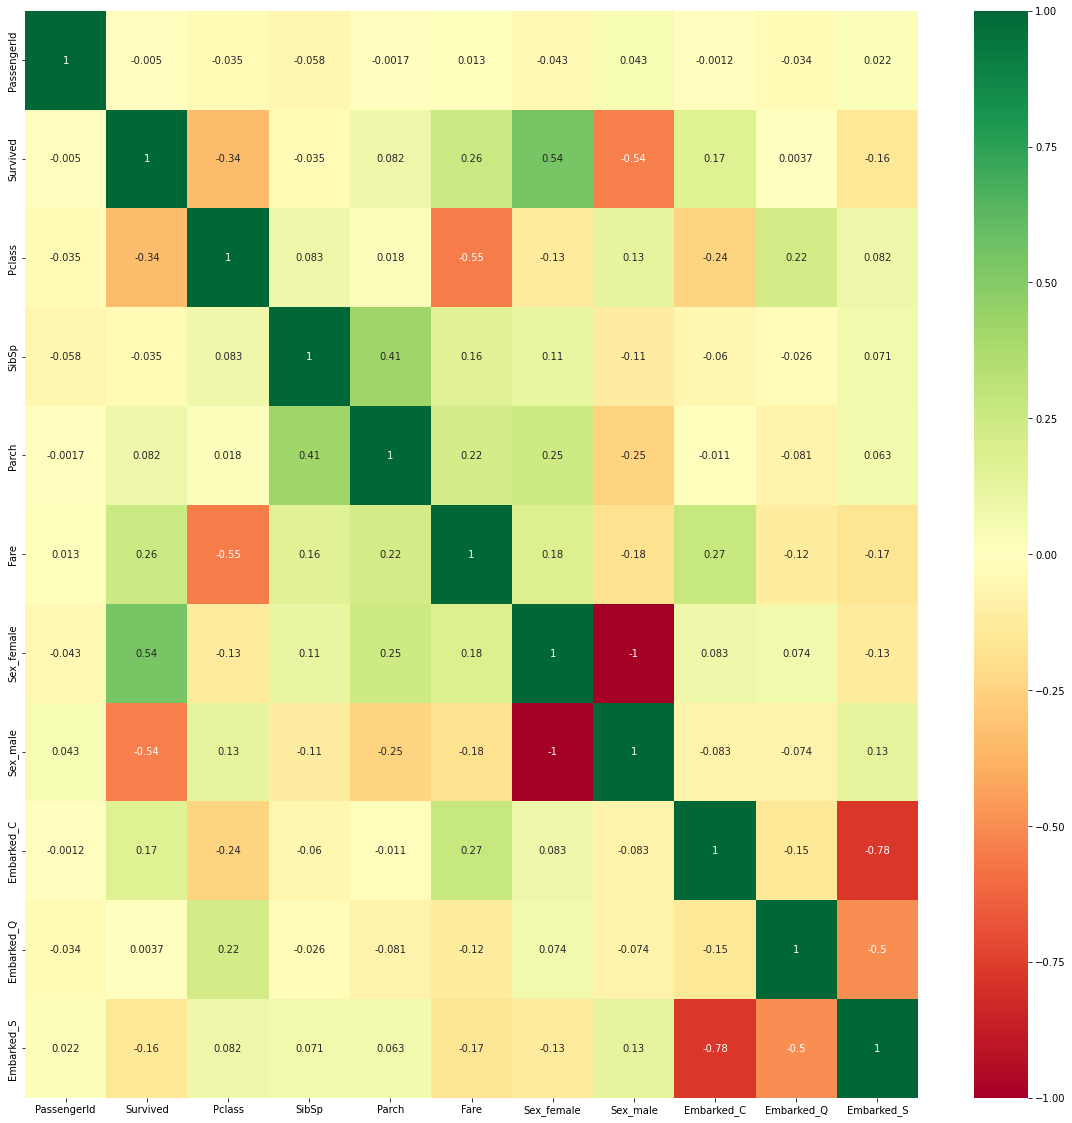

In [119]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')

# feature inportance

In [75]:
clf = ExtraTreesClassifier()
clf.fit(X,y)

ExtraTreesClassifier()

In [76]:
print(clf.feature_importances_)

[0.27760662 0.10794477 0.23985035 0.05598389 0.05202583 0.26658855]


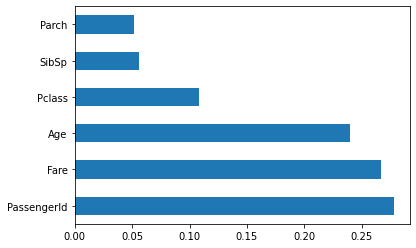

In [79]:
fea_importace=pd.Series(clf.feature_importances_,index=X.columns)
fea_importace.nlargest(10).plot(kind='barh')
plt.show()